### PAC4: Desapareguts GC

In [25]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [26]:
#################################################
# Accés als fitxers de dades
#################################################

from google.colab import drive

# Armo unitat
drive.mount('/content/drive')

# Em posiciono al directori de treball de la PAC4
%cd /content/drive/MyDrive/Colab Notebooks/VD/data

dgc = pd.read_csv('desap_guerra_civil.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/VD/data


In [27]:
#################################################
# Estructura del dataset
#################################################

# Obtenir el nombre de files i columnes
files, columnes = dgc.shape

# Mostrar el nombre de files i columnes
print(f"El dataset té {files} files i {columnes} columnes.")

# Obtenir els noms de les columnes i els seus tipus
print( dgc.dtypes)


El dataset té 5307 files i 41 columnes.
Id Afectat                    int64
Nom Desaparegut              object
Sexe                         object
Municipi naixement           object
Comarca naixement            object
Província naixement          object
País estranger naixement     object
Data naixement               object
Període naixement_1         float64
Període naixement_2         float64
Municipi habitual            object
Comarca habitual             object
Província habitual           object
És militar                    int64
Data mobilització            object
Lleva                        object
És voluntari                  int64
Exèrcit                      object
Unitat militar               object
Professió                    object
Data desaparició             object
Període desaparició_1       float64
Període desaparició_2       float64
Indret desaparició           object
Comarca desaparició          object
Província desaparició        object
País desaparició        

In [28]:
# 10 primers
print(dgc.head(10))

   Id Afectat Nom Desaparegut  Sexe Municipi naixement  Comarca naixement  \
0           1             JAM  Home          PUIGCERDÀ           Cerdanya   
1           2             FAM  Home          BARCELONA         Barcelonès   
2           3             JAP  Home     CUEVAS DE VERA          z_Espanya   
3           4             SAP  Home              UNIÓN          z_Espanya   
4           5             JAC  Home          PALANQUES          z_Espanya   
5           6             MAN  Home          BARCELONA         Barcelonès   
6           7             MAF  Home           SABADELL  Vallès Occidental   
7           8             JAC  Home          BARCELONA         Barcelonès   
8           9             BAP  Home            CASERES         Terra Alta   
9          10             MAP  Home             OLUGES            Segarra   

  Província naixement País estranger naixement Data naixement  \
0              Girona                      NaN            NaN   
1           Barcelona 

Període afusellament_2      99.868099
Període afusellament_1      99.359337
País estranger naixement    98.209911
Data afusellament           95.571886
Lleva                       95.081967
Província afusellament      94.761636
Lloc afusellament           94.761636
Comarca afusellament        94.742793
País afusellament           94.742793
Data mobilització           94.554362
Període desaparició_2       92.236669
Període naixement_2         91.520633
Província localitzat        89.353684
Cementiri                   89.334841
Indret localitzat           88.901451
Municipi localitzat         88.901451
Comarca localitzat          88.882608
Unitat militar              75.390993
Període desaparició_1       66.968155
Període naixement_1         63.011117
Data naixement              53.099680
Professió                   50.631242
Data desaparició            48.388920
Província desaparició       37.441116
Comarca desaparició         35.990202
Exèrcit                     33.408705
Província ha

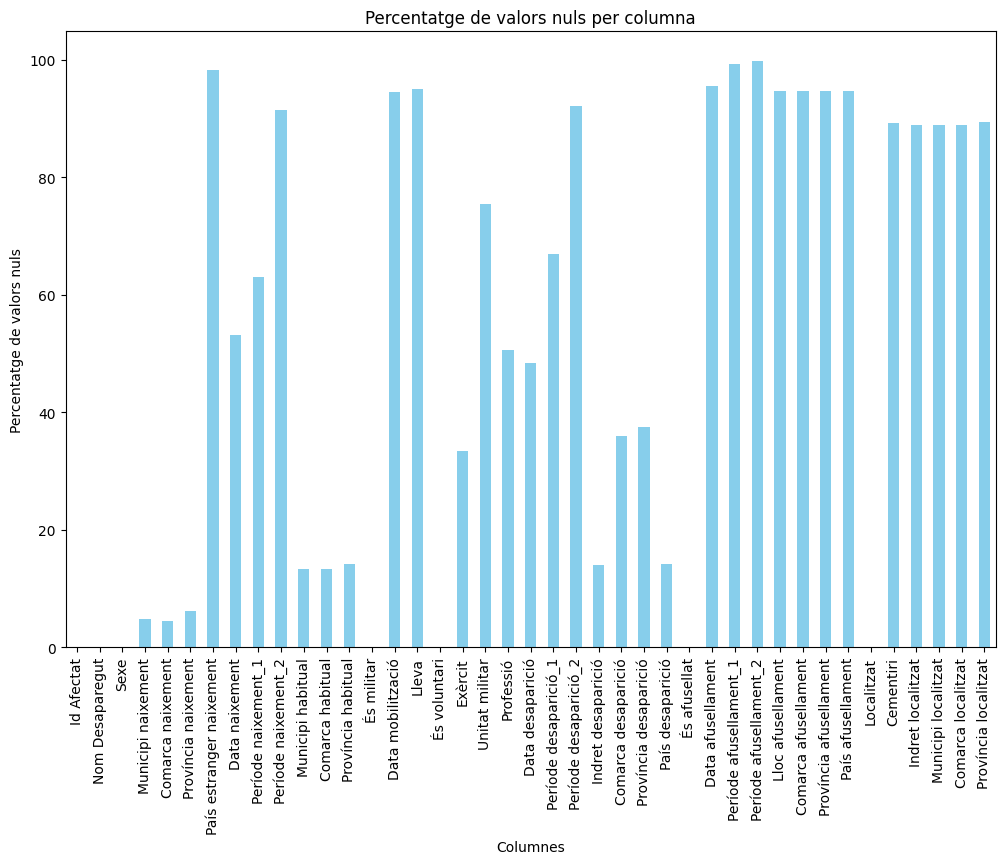

In [29]:
# Calcula el percentatge de valors nuls per a cada columna
percentatge_nuls = dgc.isnull().mean() * 100

# Mostra els resultats
print(percentatge_nuls.sort_values(ascending=False))

# Visualització dels percentatges de valors nuls
plt.figure(figsize=(12, 8))
percentatge_nuls.plot(kind='bar', color='skyblue')
plt.title('Percentatge de valors nuls per columna')
plt.xlabel('Columnes')
plt.ylabel('Percentatge de valors nuls')
plt.xticks(rotation=90)
plt.show()


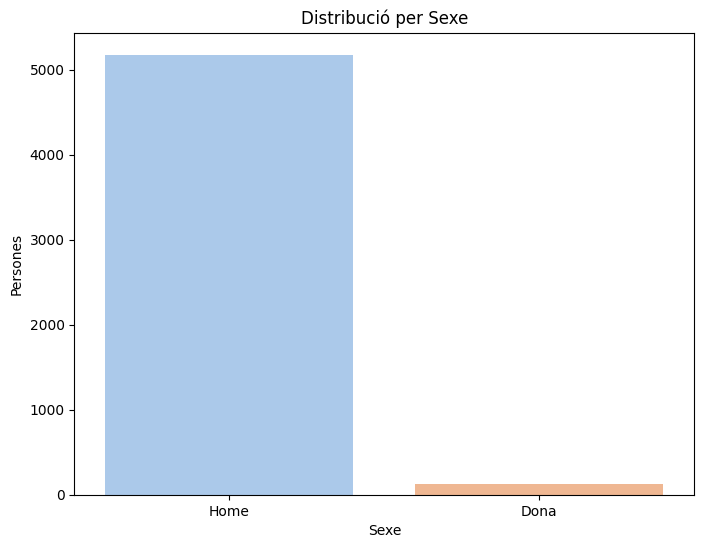

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribució per sexe
plt.figure(figsize=(8, 6))
sns.countplot(x='Sexe', hue='Sexe', data=dgc, palette='pastel', dodge=False, legend=False)
plt.title('Distribució per Sexe')
plt.xlabel('Sexe')
plt.ylabel('Persones')
plt.show()

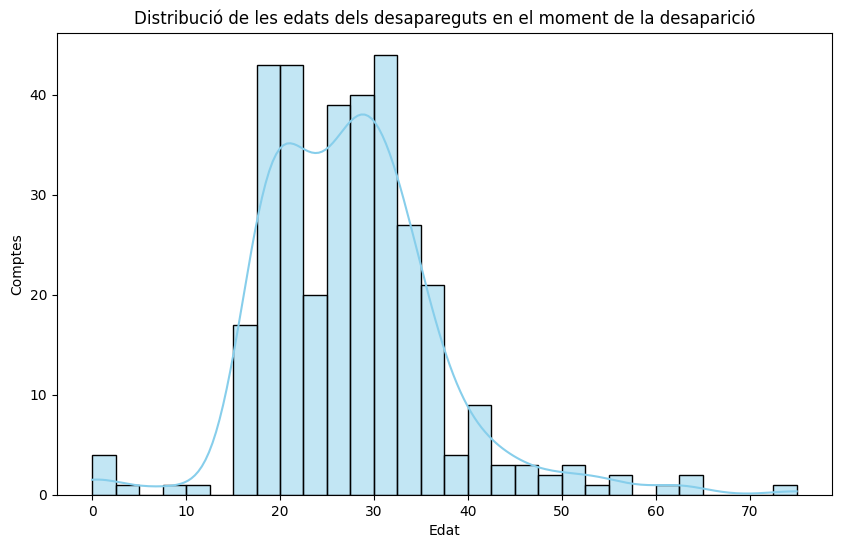

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir les columnes de dates a format datetime
dgc['Data naixement'] = pd.to_datetime(dgc['Data naixement'], errors='coerce')
dgc['Data desaparició'] = pd.to_datetime(dgc['Data desaparició'], errors='coerce')

# Calcular les edats en el moment de la desaparició
dgc['Edat desaparegut'] = (dgc['Data desaparició'] - dgc['Data naixement']).dt.days // 365

# Negatius a 0
dgc['Edat desaparegut'] = dgc['Edat desaparegut'].apply(lambda x: max(x, 0))

# Crear un histograma de les edats
plt.figure(figsize=(10, 6))
sns.histplot(dgc['Edat desaparegut'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribució de les edats dels desapareguts en el moment de la desaparició')
plt.xlabel('Edat')
plt.ylabel('Comptes')
plt.show()


In [33]:
# Nou camp 'any_desap'
dgc['any_desap'] = dgc['Data desaparició'].dt.year


In [34]:
# Crear el nuevo campo 'es_religios'
religious_professions = ['SACERDOT', 'CAPELLÀ', 'MONJA']
dgc['es_religios'] = dgc['Professió'].isin(religious_professions).astype(int)

# Contar el número de ceros y unos en la columna 'es_religios'
print(dgc['es_religios'].value_counts())


es_religios
0    5235
1      72
Name: count, dtype: int64


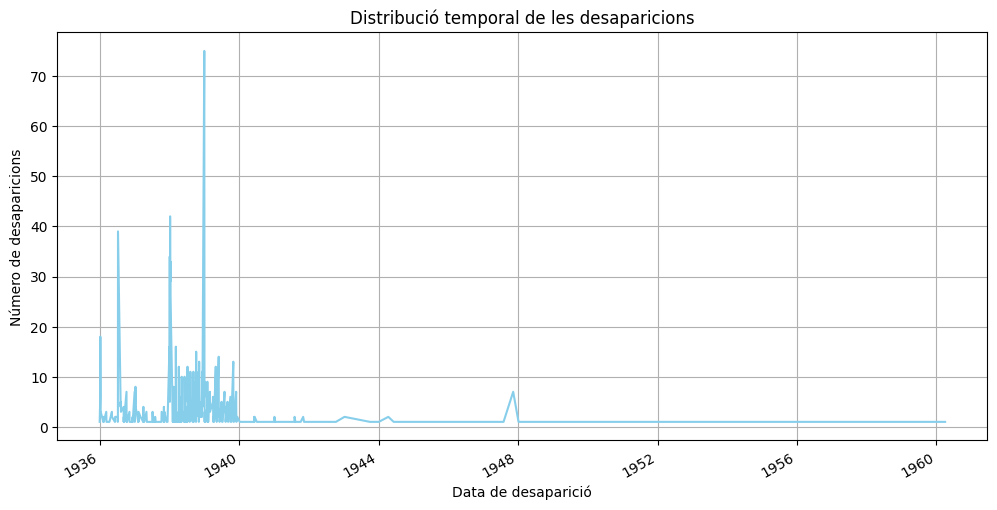

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna de fecha de desaparición a formato datetime
dgc['Data desaparició'] = pd.to_datetime(dgc['Data desaparició'], errors='coerce')

# Contar el número de desapariciones por fecha
desapariciones_por_fecha = dgc['Data desaparició'].value_counts().sort_index()

# Crear la línea de tiempo (timeline)
plt.figure(figsize=(12, 6))
desapariciones_por_fecha.plot(kind='line', color='skyblue')
plt.title('Distribució temporal de les desaparicions')
plt.xlabel('Data de desaparició')
plt.ylabel('Número de desaparicions')
plt.grid(True)
plt.show()


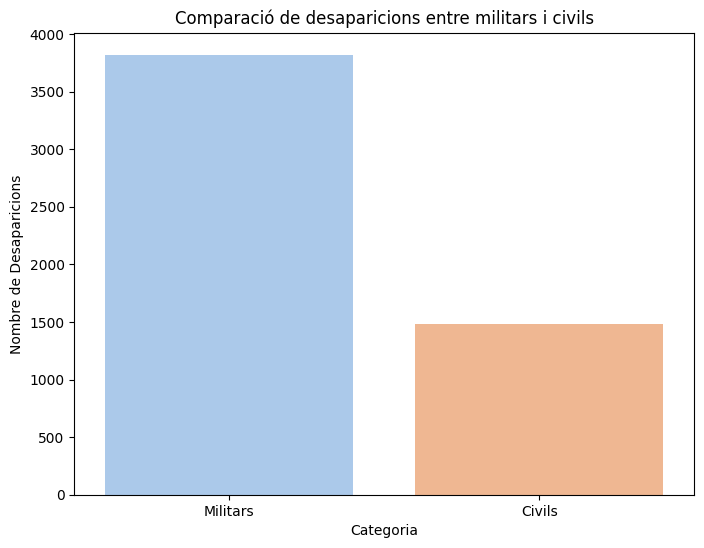

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar dades de militars i civils
militars = dgc[dgc['És militar'] == 1]
civils = dgc[dgc['És militar'] == 0]

# Comptar desaparicions per categoria
comptes_militars = militars.shape[0]
comptes_civils = civils.shape[0]

# Preparar dades per al gràfic de barres
dades = {'Categoria': ['Militars', 'Civils'], 'Nombre de Desaparicions': [comptes_militars, comptes_civils]}

# Crear el gràfic de barres amb `hue='Categoria'`
plt.figure(figsize=(8, 6))
sns.barplot(x='Categoria', y='Nombre de Desaparicions', data=dades, hue='Categoria', palette='pastel', legend=False)
plt.title('Comparació de desaparicions entre militars i civils')
plt.xlabel('Categoria')
plt.ylabel('Nombre de Desaparicions')
plt.show()



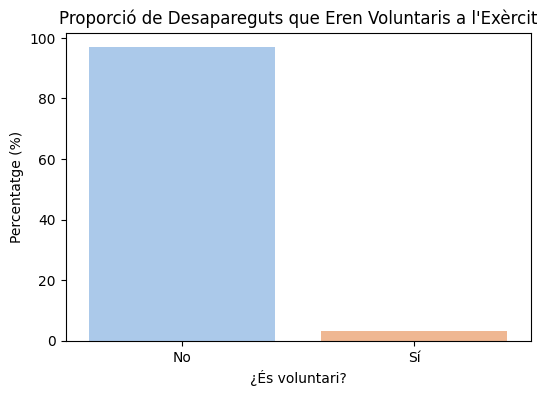

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la proporció de voluntaris i no voluntaris
proporció_voluntaris = dgc['És voluntari'].value_counts(normalize=True) * 100

# Crear un gràfic de barres
plt.figure(figsize=(6, 4))
sns.barplot(x=proporció_voluntaris.index, y=proporció_voluntaris.values, hue=proporció_voluntaris.index, palette=sns.color_palette('pastel', n_colors=2), dodge=False, legend=False)
plt.title('Proporció de Desapareguts que Eren Voluntaris a l\'Exèrcit')
plt.xlabel('¿És voluntari?')
plt.ylabel('Percentatge (%)')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


In [38]:
# Professions
profession_counts = dgc['Professió'].value_counts()
print(profession_counts)

Professió
PAGÈS                                             845
JORNALER                                          152
PALETA                                             94
CAPELLÀ                                            69
FUSTER                                             61
                                                 ... 
TREBALLADOR DEL MERCAT DE SANT ADRIÀ DEL BESÒS      1
FUNCIONARI DEL BANC D'ESPANYA                       1
OBRER FÀBRICA BOMBAU                                1
MESTRE D'OBRES                                      1
PINTOR MECÀNIC                                      1
Name: count, Length: 266, dtype: int64


In [39]:
# Calcular el recuento de la pareja: 'Província naixement' y 'Província desaparició'
if 'Província naixement' in dgc.columns and 'Província desaparició' in dgc.columns:
    provincia_counts = dgc.groupby(['Província naixement', 'Província desaparició']).size().reset_index(name='count')

    # Ordenar los resultados de más a menos desapariciones
    provincia_counts_sorted = provincia_counts.sort_values(by='count', ascending=False)
    print(provincia_counts_sorted)

    Província naixement Província desaparició  count
74            Barcelona                Lleida    242
82            Barcelona             Tarragona    231
64            Barcelona             Barcelona    213
416           Tarragona             Tarragona    166
272              Lleida                Lleida    138
..                  ...                   ...    ...
323              Múrcia              Albacete      1
146               Conca              Castelló      1
325              Múrcia                 Cadis      1
326              Múrcia             Cantàbria      1
485               Àvila              Zaragoza      1

[486 rows x 3 columns]


In [40]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["Tots", "Presentats", "Incidència presentació", "Amb vídeo", "Sense vídeo",
               "Fora bústia", "Fora termini", "No lliurat", "Video bo", "Video dolent",
               "A", "B", "C+", "C-", "NP"],
        color=[
            'rgba(31, 119, 180, 0.8)',  # Tots
            'rgba(255, 127, 14, 0.8)',   # Presentats
            'rgba(44, 160, 44, 0.8)',    # Incidència presentació
            'rgba(214, 39, 40, 0.8)',    # Amb vídeo
            'rgba(148, 103, 189, 0.8)',  # Sense vídeo
            'rgba(140, 86, 75, 0.8)',    # Fora bústia
            'rgba(227, 119, 194, 0.8)',  # Fora termini
            'rgba(127, 127, 127, 0.8)',  # No lliurat
            'rgba(188, 189, 34, 0.8)',   # Video bo
            'rgba(23, 190, 207, 0.8)',   # Video dolent
            'rgba(31, 119, 180, 0.8)',   # A
            'rgba(255, 127, 14, 0.8)',   # B
            'rgba(44, 160, 44, 0.8)',    # C+
            'rgba(214, 39, 40, 0.8)',    # C-
            'rgba(148, 103, 189, 0.8)',  # NP
        ]
    ),
    link=dict(
        source=[0, 0, 1, 1, 2, 2, 2, 3, 3, 8, 8, 9, 9, 9, 4, 5, 6, 7],  # indices correspond to labels
        target=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 13, 14, 14, 14],
        value=[53, 7, 52, 1, 1, 1, 5, 30, 22, 20, 10, 5, 13, 4, 1, 1, 1, 5],
        color='rgba(0, 0, 0, 0.5)'
    ))])

fig.update_layout(title_text="PREVISIÓ DE RESULTATS PAC2 VISUALITZACIÓ DE DADES (abril 2024)", font_size=10)
fig.show()



In [41]:
# Guarda el DataFrame en un archivo CSV llamado desap_guerra_civil_clean.csv
dgc.to_csv('desap_guerra_civil_clean.csv', index=False)